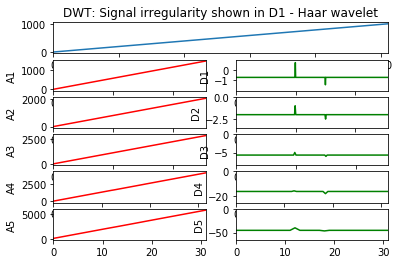

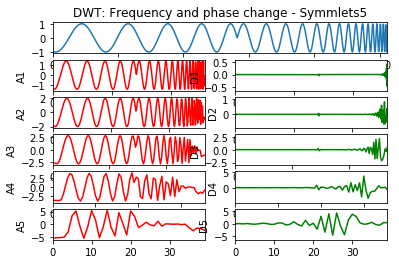

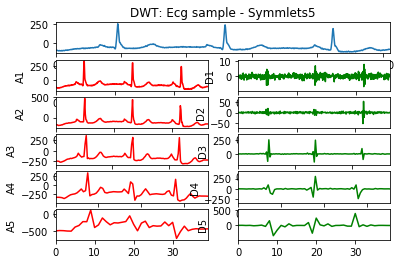

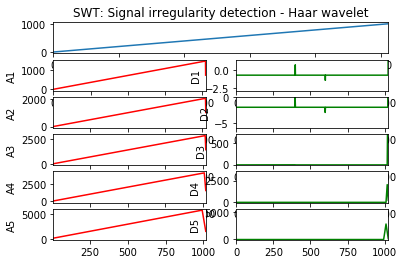

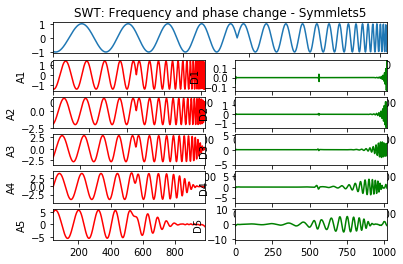

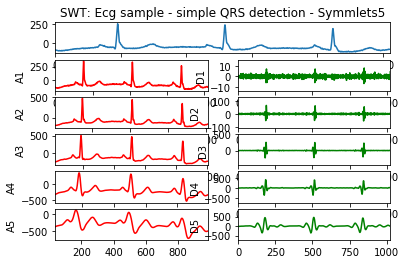

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.sp1DWT = 1


def plot_coeffs(data, w, title, use_dwt=True):
    """Show dwt or swt coefficients for given data and wavelet."""
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []

    if use_dwt:
        for i in range(5):
            (a, d) = pywt.dwt(a, w, mode)
            ca.append(a)
            cd.append(d)
    else:
        coeffs = pywt.swt(data, w, 5)  # [(cA5, cD5), ..., (cA1, cD1)]
        for a, d in reversed(coeffs):
            ca.append(a)
            cd.append(d)

    fig = plt.figure()
    ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, x in enumerate(ca):
        ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
        ax.plot(x, 'r')
        ax.set_ylabel("A%d" % (i + 1))
        if use_dwt:
            ax.set_xlim(0, len(x) - 1)
        else:
            ax.set_xlim(w.dec_len * i, len(x) - 1 - w.dec_len * i)

    for i, x in enumerate(cd):
        ax = fig.add_subplot(len(cd) + 1, 2, 4 + i * 2)
        ax.plot(x, 'g')
        ax.set_ylabel("D%d" % (i + 1))
        # Scale axes
        ax.set_xlim(0, len(x) - 1)
        if use_dwt:
            ax.set_ylim(min(0, 1.4 * min(x)), max(0, 1.4 * max(x)))
        else:
            vals = x[w.dec_len * (1 + i):len(x) - w.dec_len * (1 + i)]
            ax.set_ylim(min(0, 2 * min(vals)), max(0, 2 * max(vals)))


# Show DWT coefficients
use_dwt = True
plot_coeffs(data1, 'db1',
            "DWT: Signal irregularity shown in D1 - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "DWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "DWT: Ecg sample - Symmlets5", use_dwt)

# Show DWT coefficients
use_dwt = False
plot_coeffs(data1, 'db1', "SWT: Signal irregularity detection - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "SWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "SWT: Ecg sample - simple QRS detection - Symmlets5",
            use_dwt)


plt.show()

In [2]:
%matplotlib inline

In [6]:
data2

array([-0.93512925, -0.94779082, -0.95912178, ..., -0.67940178,
       -0.99311997, -0.47020553])